In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.fft import fft
import scipy.signal as signal
from math import log10

In [2]:
plt.style.use("ggplot")
#Estilo de ploteo

**SE OBTIENE EL DATASET**




In [3]:
#Importamos la data
ecg_basal=pd.read_csv('ecg_basal1.csv', quotechar="'", index_col=0)
print(ecg_basal)

        d_sensor2
t2               
0.000       509.0
0.001       507.0
0.002       505.0
0.003       504.0
0.004       507.0
...           ...
25.495      505.0
25.496      510.0
25.497      515.0
25.498      519.0
25.499      520.0

[25500 rows x 1 columns]


In [4]:
ecg_sinrespirar=pd.read_csv('ecg_sinrespirar1.csv', quotechar="'", index_col=0)
print(ecg_sinrespirar)

        d_sensor3
t3               
0.000       502.0
0.001       508.0
0.002       512.0
0.003       514.0
0.004       512.0
...           ...
33.145      496.0
33.146      499.0
33.147      502.0
33.148      507.0
33.149      512.0

[33150 rows x 1 columns]


In [5]:
ecg_ejercicio=pd.read_csv('ecg_ejercicio1.csv', quotechar="'", index_col=0)
print(ecg_ejercicio)

        d_sensor5
t5               
0.000       470.0
0.001       468.0
0.002       467.0
0.003       468.0
0.004       470.0
...           ...
34.645      509.0
34.646      507.0
34.647      505.0
34.648      504.0
34.649      505.0

[34650 rows x 1 columns]


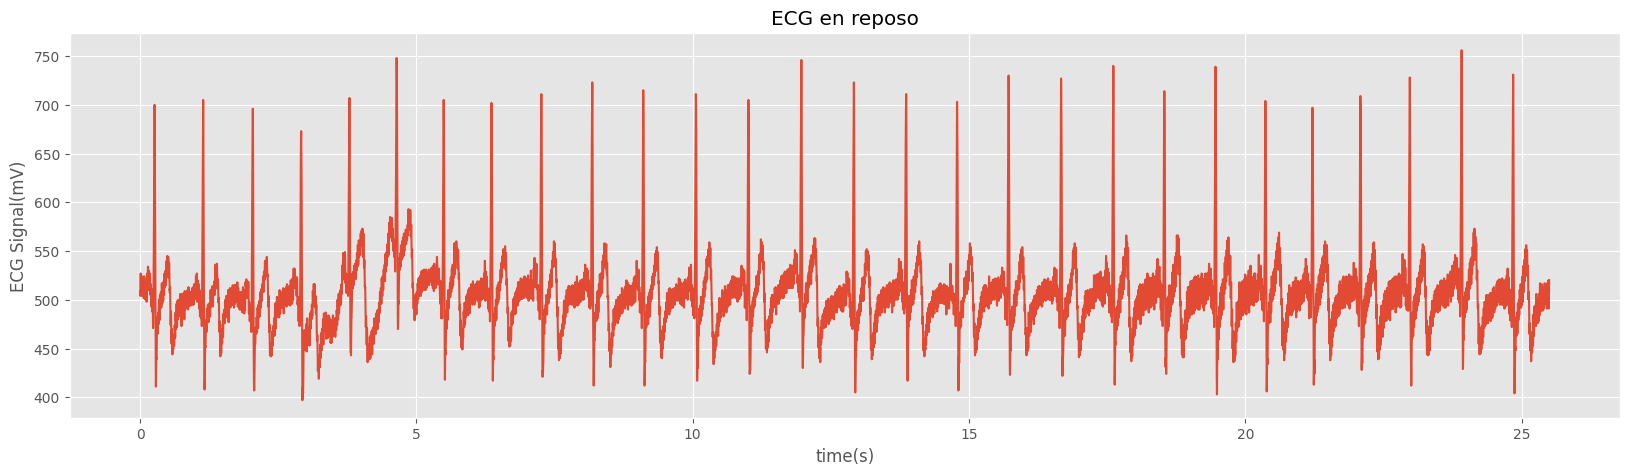

In [6]:
# A numpy
time=ecg_basal.index
voltaje = ecg_basal.to_numpy()
plt.figure(figsize=(20,5))
plt.plot(time, voltaje)
plt.title("ECG en reposo")
plt.ylabel('ECG Signal(mV)')
plt.xlabel('time(s)')
plt.show()

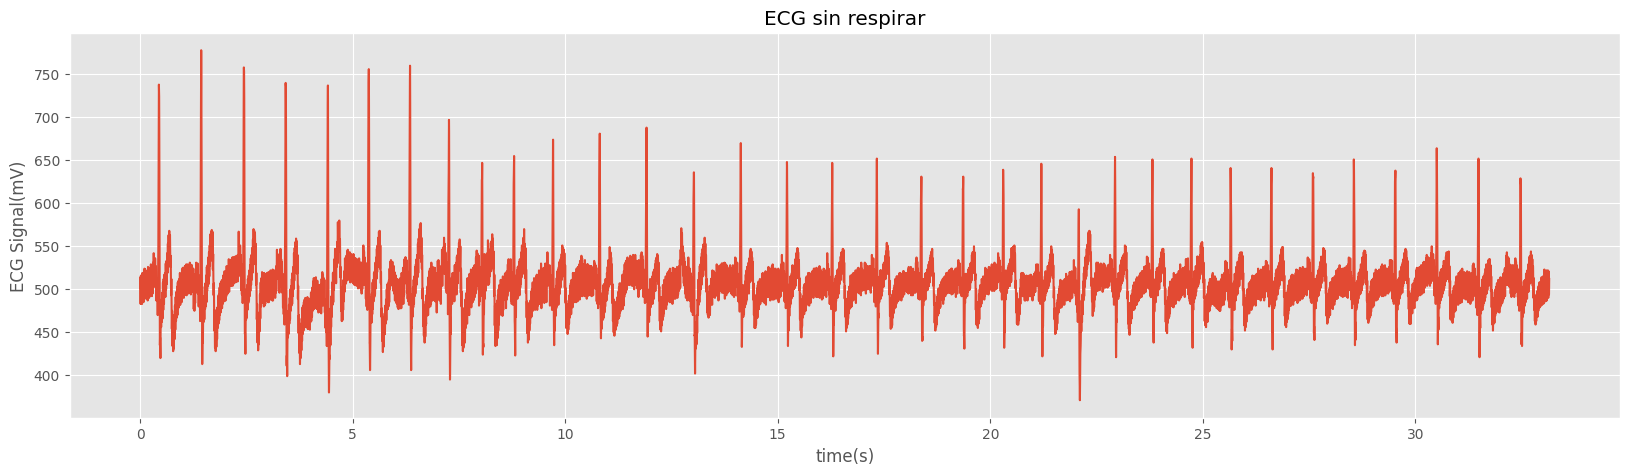

In [7]:
# A numpy
time2=ecg_sinrespirar.index
voltaje2 = ecg_sinrespirar.to_numpy()
plt.figure(figsize=(20,5))
plt.plot(time2, voltaje2)
plt.title("ECG sin respirar")
plt.ylabel('ECG Signal(mV)')
plt.xlabel('time(s)')
plt.show()

**SE ANALIZA LA SEÑAL EN FRECUENCIA**

Conociendo los datos de adquisición de la señal, analicemos ahora el espectro de Fourier.

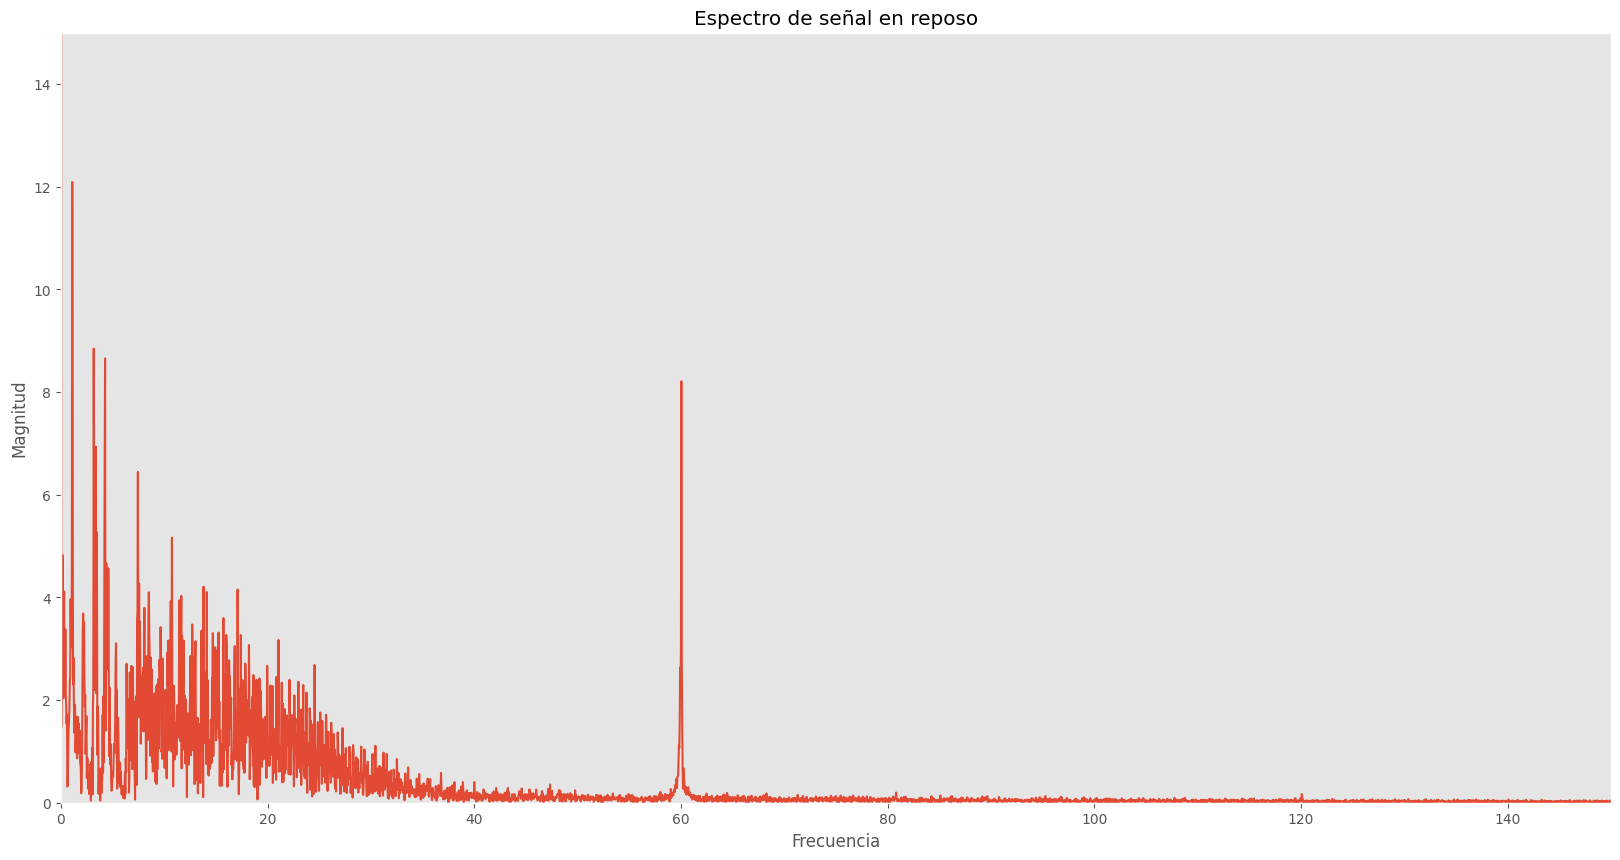

In [9]:
# Analizar el Fourier
# Periodo de 1ms (0.001s) o frecuencia de 1000 Hz--> cambiamos la frecuencia por la q usamos
T = 0.001
Fs=1/T
ecg_senal = voltaje[:,0]
N = len(ecg_senal)
yf = fft(ecg_senal)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(20,10))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.xlim([0,150])
plt.ylim([0,15])
plt.title("Espectro de señal en reposo")
plt.show()

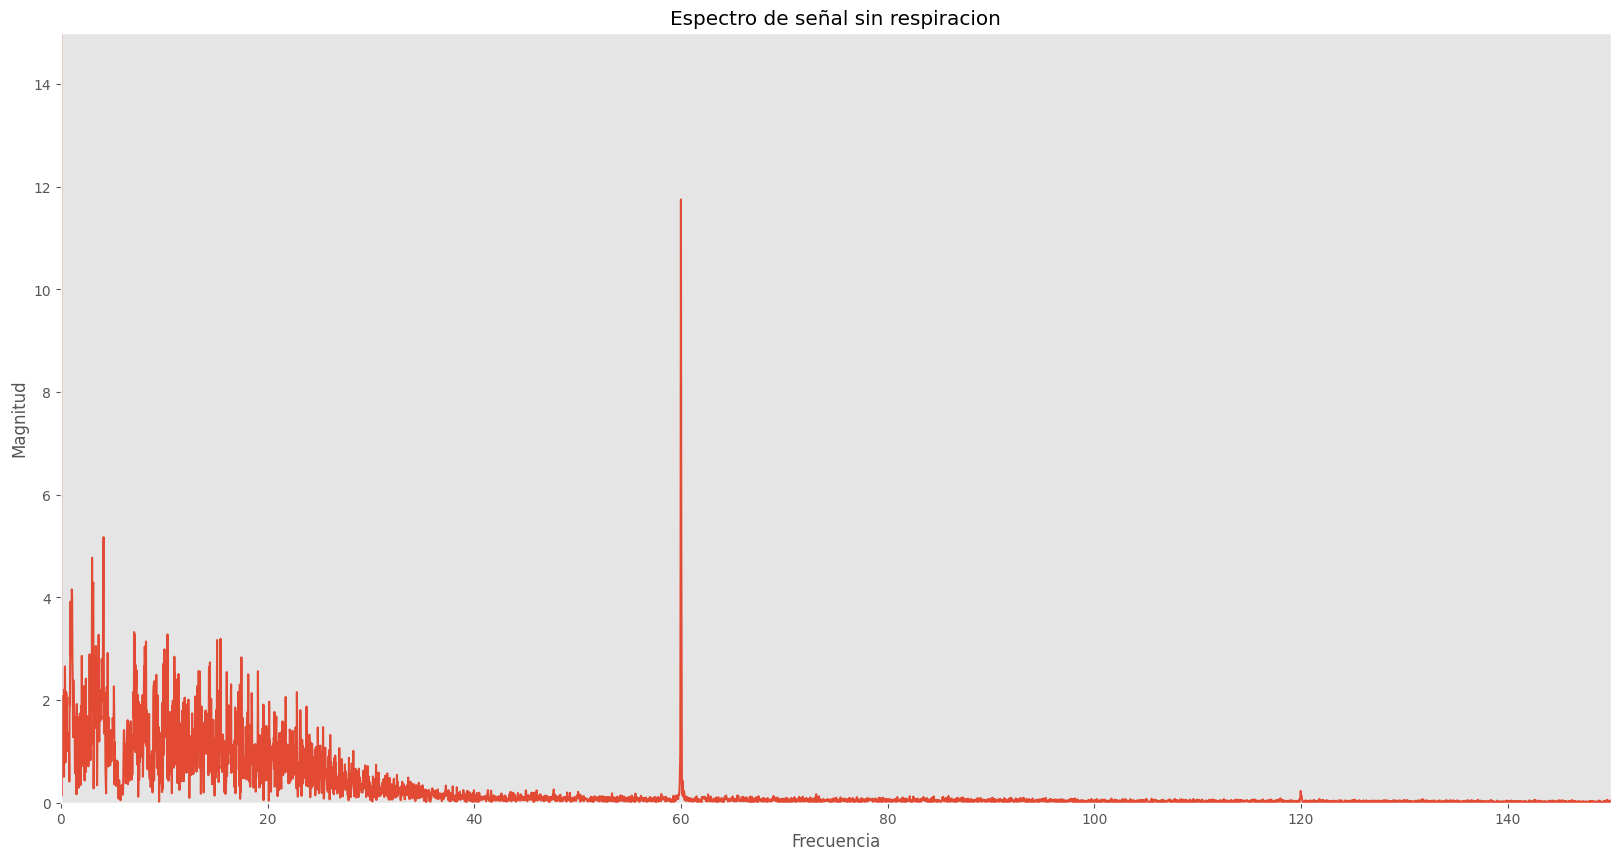

In [10]:
# Analizar el Fourier
# Periodo de 1ms (0.001s) o frecuencia de 1000 Hz--> cambiamos la frecuencia por la q usamos
T = 0.001
Fs=1/T
ecg_senal2 = voltaje2[:,0]
N2 = len(ecg_senal2)
yf2 = fft(ecg_senal2)
xf2 = np.linspace(0.0, 1.0/(2.0*T), N2//2)
plt.figure(figsize=(20,10))
plt.plot(xf2, 2.0/N2 * np.abs(yf2[0:N2//2]))
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.xlim([0,150])
plt.ylim([0,15])
plt.title("Espectro de señal sin respiracion")
plt.show()

En el gráfico anterior, existe un ruido en 50 Hz y armónicos en 150 HZ. Por lo tanto, se debe filtrar.

Se propone utilizar filtros digitales Notch



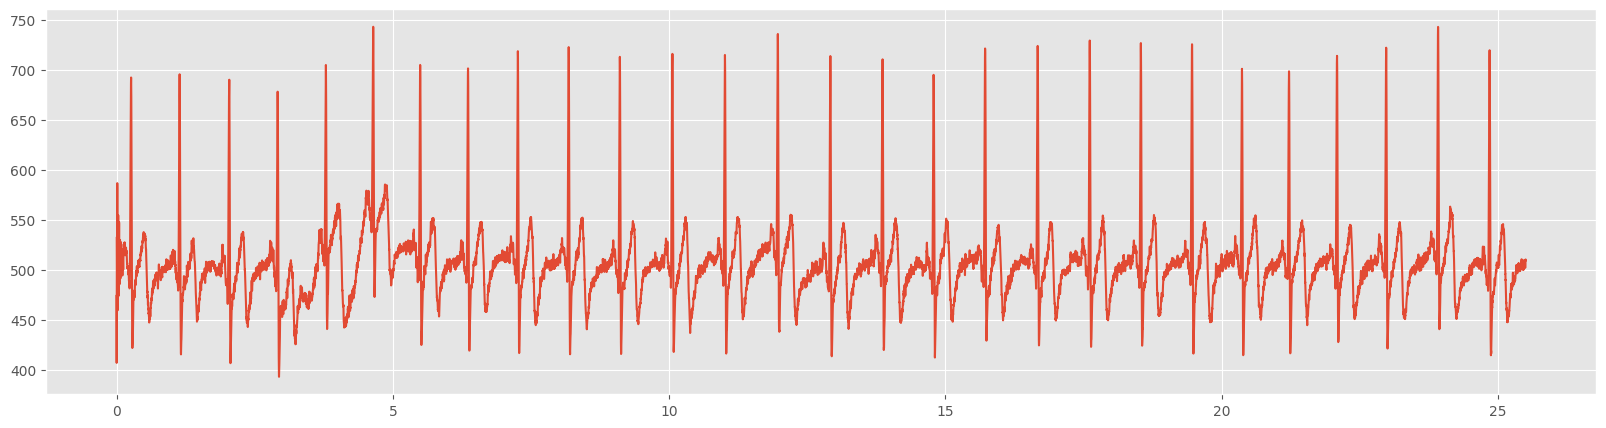

In [12]:
# Utilizar filtros Notch para quitar frecuencias que hagan ruido
from scipy.signal import iirnotch, lfilter
fs = 1/T  # Frecuencia de muestreo (Hz)
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, fs)
y = lfilter(b, a, ecg_senal)
y = lfilter(b, a, y)
y2 = lfilter(b, a, ecg_senal2)
y2 = lfilter(b, a, y2)
fs = 1/T  # Frecuencia de muestreo (Hz)
f0 = 120.0  # Frecuencia que queremos filtrar (Hz)
Q = 7.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, fs)
y = lfilter(b,a,y)
y2 = lfilter(b,a,y2)
plt.figure(figsize=(20,5))
#plt.xlim(0,200)
plt.plot(time,y)
plt.show()

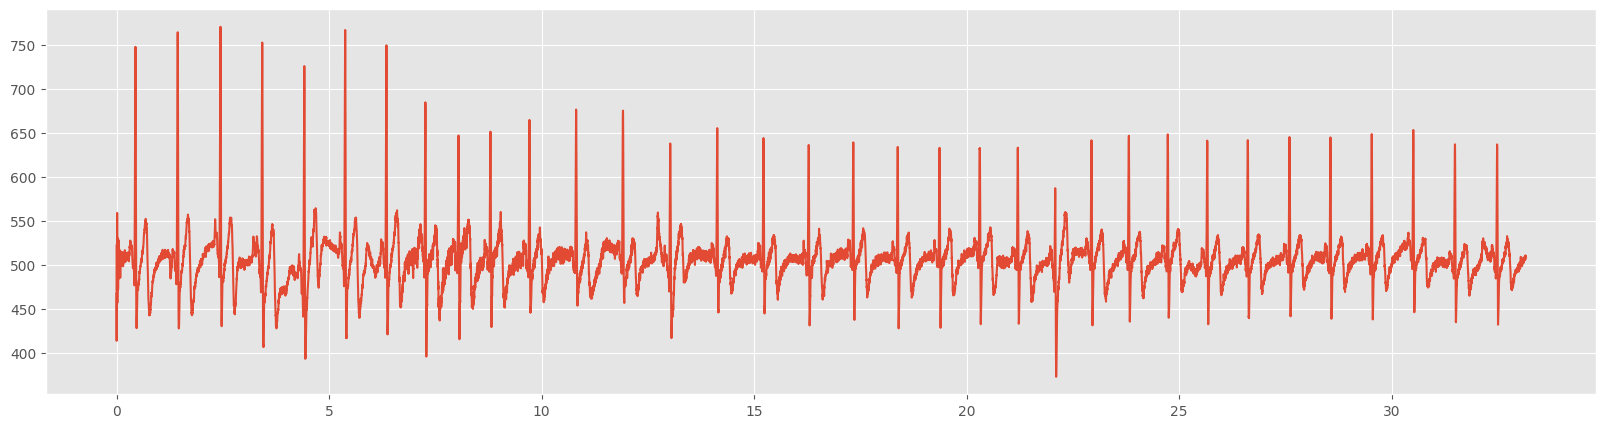

In [13]:
plt.figure(figsize=(20,5))
plt.plot(time2,y2)

Regresamos a verificar las atenuaciones de los filtros en frecuencia

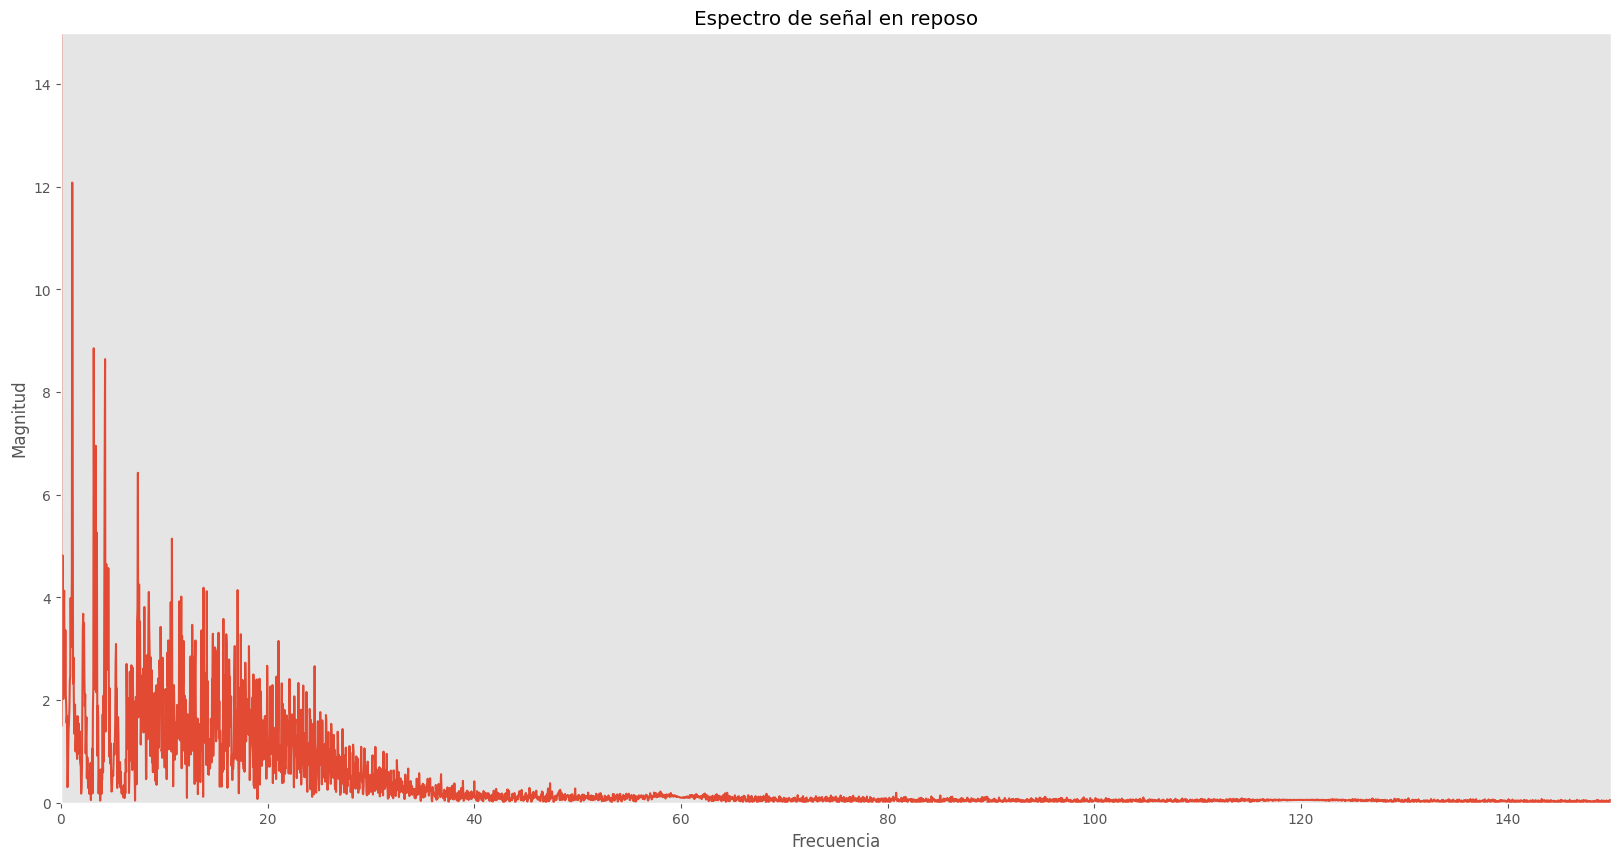

In [14]:
# Analisis de Fourier de los filtros
# Periodo de 2ms (0.002s) o frecuencia de 500 Hz
T = 0.001
N = len(y)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.figure(figsize=(20,10))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.xlim([0,150])
plt.ylim([0,15])
plt.title("Espectro de señal en reposo")
plt.show()
ecg_signal = y

**FILTRADO DE PASA BANDA**

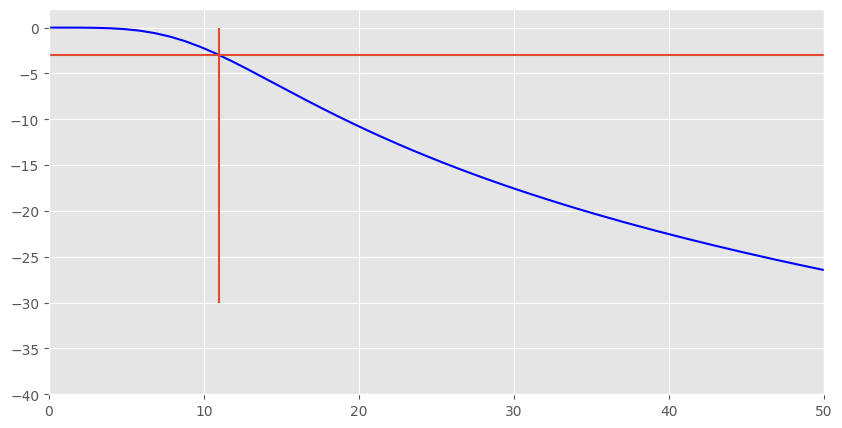

In [15]:
from scipy.signal import freqz, iirdesign, iirfilter, find_peaks
# 2. filtro pasa banda
# Sub filtro pasa bajo
b, a = iirfilter(2, 11.0, btype='lowpass', rs=3, ftype='butter', fs=1000)
w, h = freqz(b, a, fs=1000)
plt.figure(figsize=(10,5))
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.hlines(-3,0,250)
plt.xlim(0,50)
plt.vlines(11, -30, 0)
plt.ylim(-40,2)
plt.show()

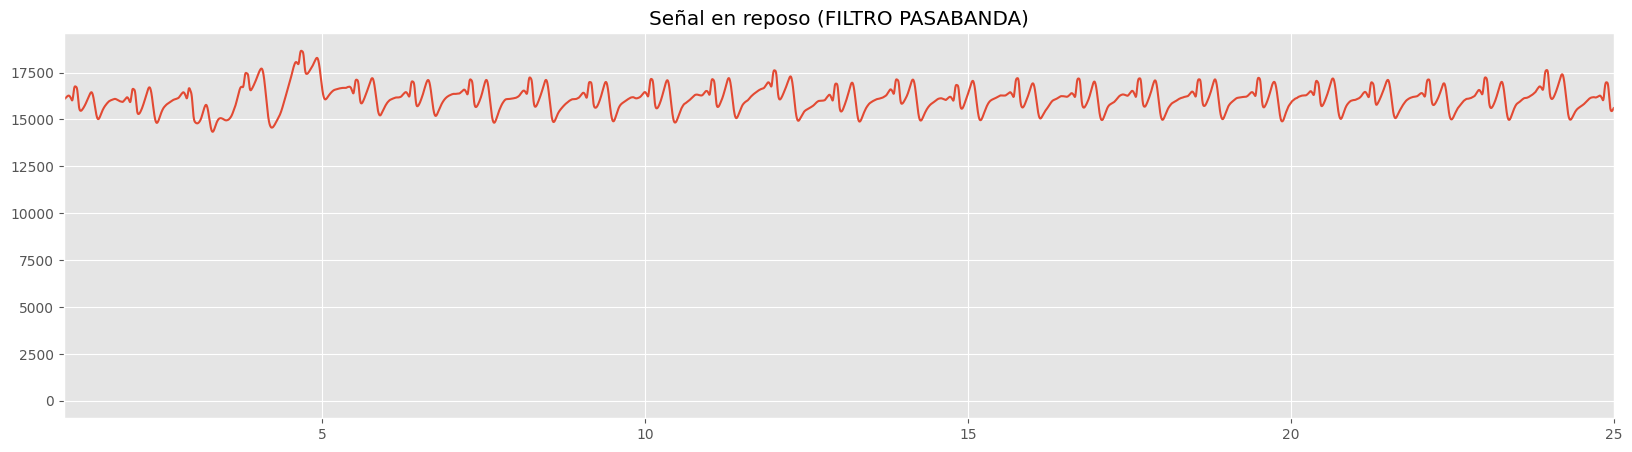

In [42]:
fpb_signal = lfilter(b, a, ecg_signal)
#fpb_signal=fpb_signal[0:25500]
plt.figure(figsize=(20,5))
plt.plot(time,fpb_signal)
plt.xlim([1,25])
#plt.ylim([400,750])
plt.title("Señal en reposo (FILTRO PASABANDA)")
plt.show()

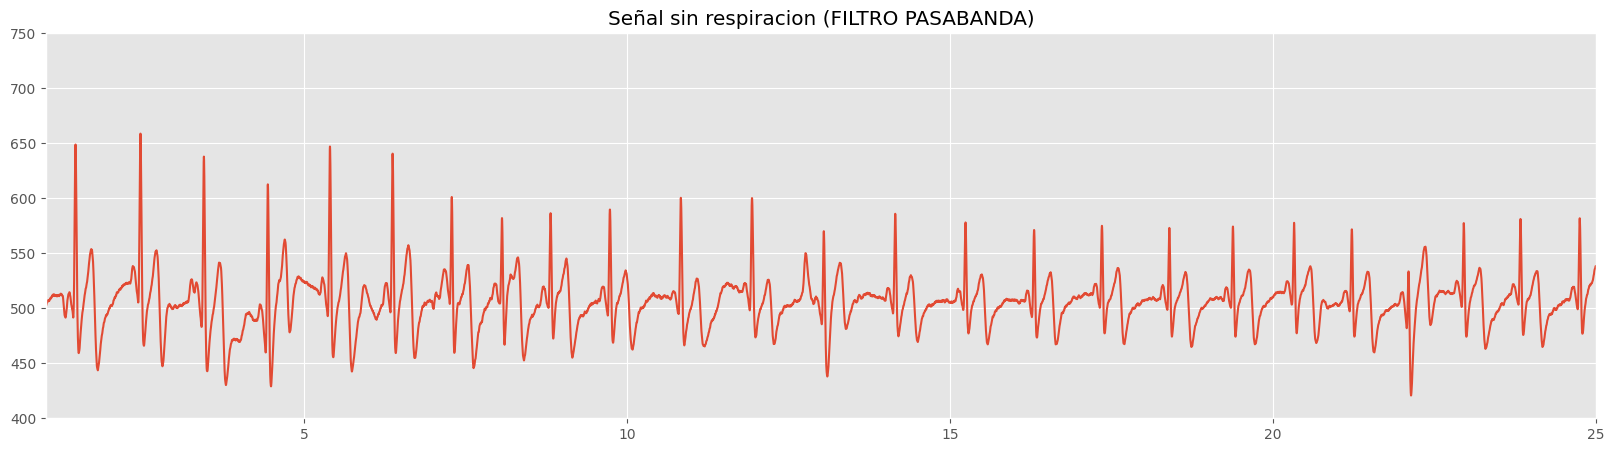

In [17]:
fpb_signal2 = lfilter(b, a, ecg_senal2)
#fpb_signal2=fpb_signal2[0:25500]
plt.figure(figsize=(20,5))
plt.plot(time2,fpb_signal2)
plt.xlim([1,25])
plt.ylim([400,750])
plt.title("Señal sin respiracion (FILTRO PASABANDA)")
plt.show()

**FILTRO PASA ALTO**

C:\Users\vmct2\AppData\Local\Temp\ipykernel_12404\1905001633.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)), 'b')


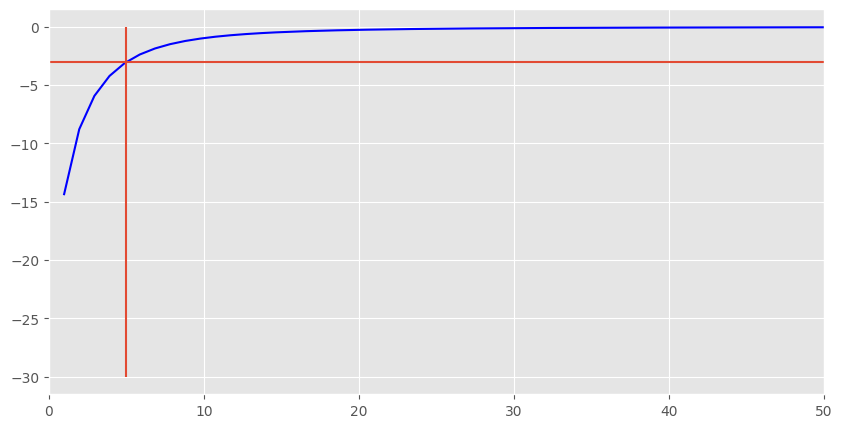

In [18]:
b, a = iirfilter(1, 5.0, btype='highpass', rs=3, ftype='butter', fs=1000)
w, h = freqz(b, a, fs=1000)
plt.figure(figsize=(10,5))
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.hlines(-3,0,250)
plt.xlim(0,50)
plt.vlines(5, -30, 0)
plt.show()


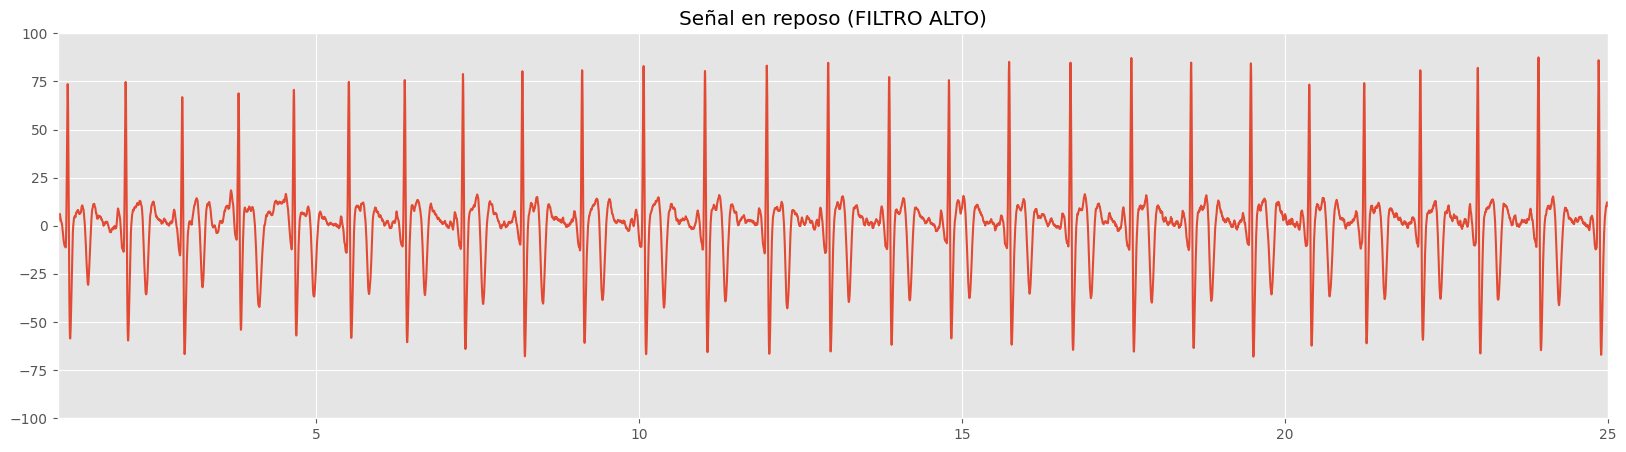

In [19]:
fpa_signal = lfilter(b, a, fpb_signal)
plt.figure(figsize=(20,5))
plt.plot(time,fpa_signal)
plt.xlim([1,25])
plt.ylim([-100,100])
plt.title("Señal en reposo (FILTRO ALTO)")
plt.show()

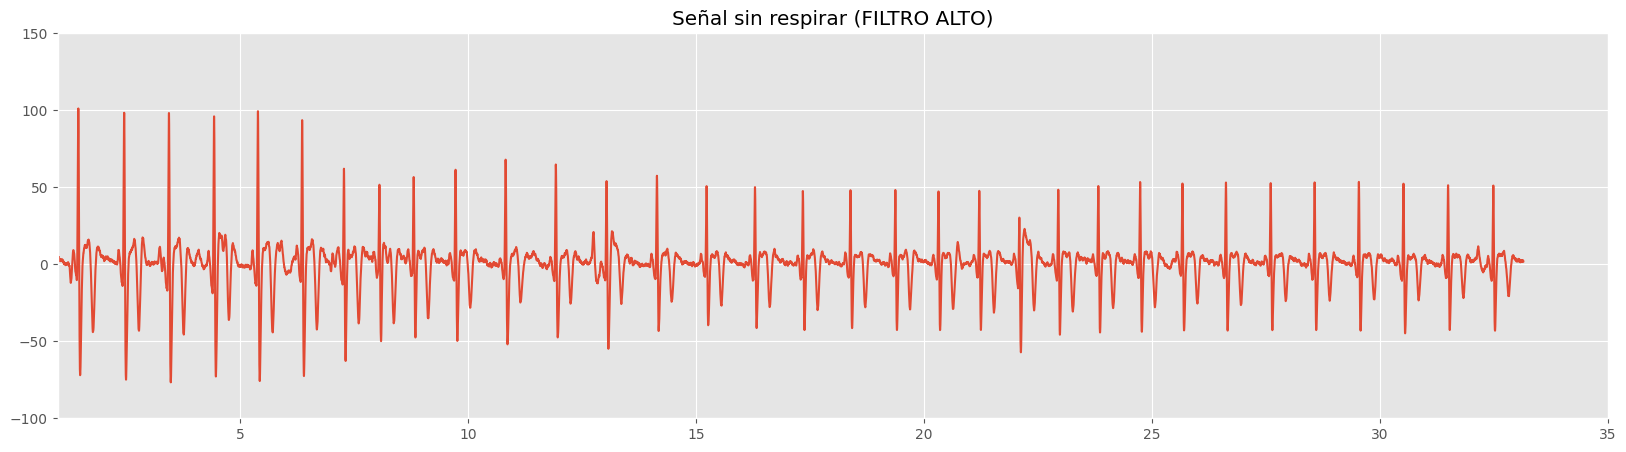

In [20]:
fpa_signal2 = lfilter(b, a, fpb_signal2)
plt.figure(figsize=(20,5))
plt.plot(time2,fpa_signal2)
plt.xlim([1,35])
plt.ylim([-100,150])
plt.title("Señal sin respirar (FILTRO ALTO)")
plt.show()

**OPERADOR DERIVATIVO**

En el artículo nos dan la siguiente función que describe al operador:

y[n]=(1/8)(−x[n−2]−2x[n−1]+2x[n+1]+x[n+2])

Para que esta ecuación pueda ser utilizada necesitamos encuadrarla en un rango de  [0,+∞]  haciendo que  n=+2  entonces tenemos:

y[n]=(1/8)(−x[n]−2x[n+1]+2x[n+3]+x[n+4]) 

Por lo tanto:

b=[−1,−2,0,2,1]

C:\Users\vmct2\AppData\Local\Temp\ipykernel_12404\4151110590.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20 * np.log10(abs(h)), 'b')


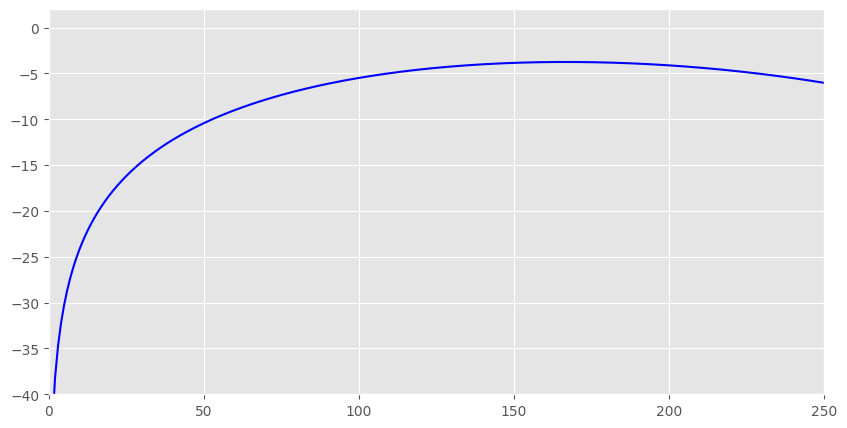

In [21]:
# Filtro derivativo
b = np.array([-1, -2, 0, 2, 1])
b = (1/8)*b
w, h = freqz(b, 1, fs=1000)
plt.figure(figsize=(10,5))
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.xlim(0,250)
plt.ylim(-40,2)
plt.show()

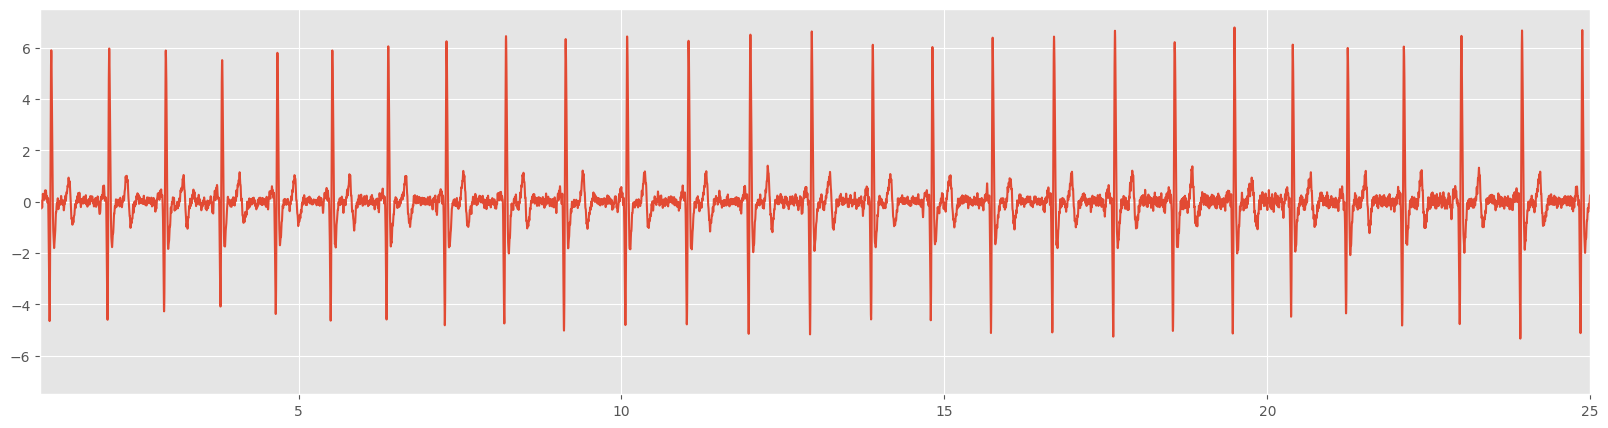

In [22]:
fd_signal = lfilter(b, 1, fpa_signal)
plt.figure(figsize=(20,5))
plt.plot(time,fd_signal)
plt.xlim(1,25)
plt.ylim(-7.5,7.5)
plt.show()

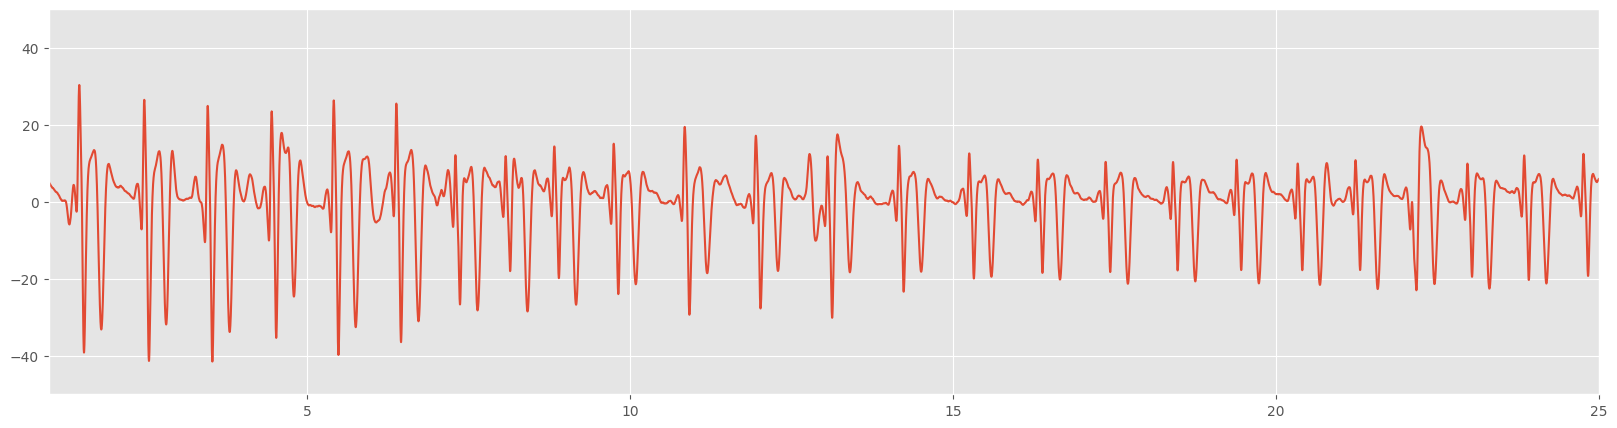

In [46]:
fd_signal2 = lfilter(b, 1, fpa_signal2)
plt.figure(figsize=(20,5))
plt.plot(time2,fd_signal2)
plt.xlim(1,25)
plt.ylim(-50,50)
plt.show()

**OPERADOR CUADRÁTICO**

Este operador solo tiene como función elevar al cuadrado los valores de la señal.

y[n]=x^2[n]

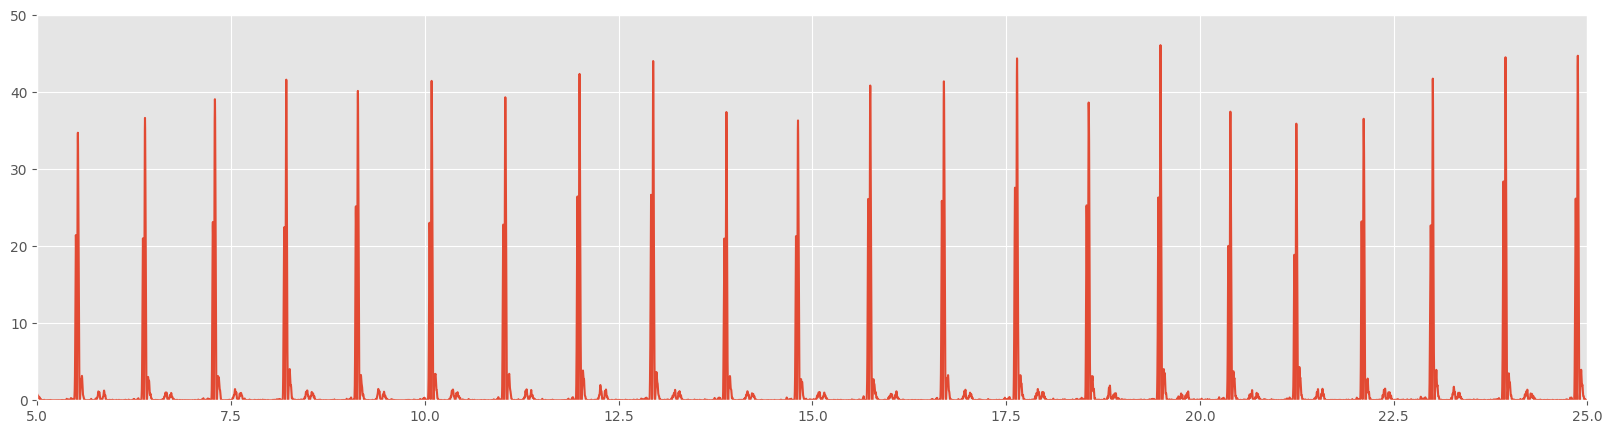

In [23]:
# Filtro cuadrado
f_sq = np.square(fd_signal)
plt.figure(figsize=(20,5))
plt.plot(time, f_sq)
plt.xlim(5,25)
plt.ylim(0,50)
plt.show()

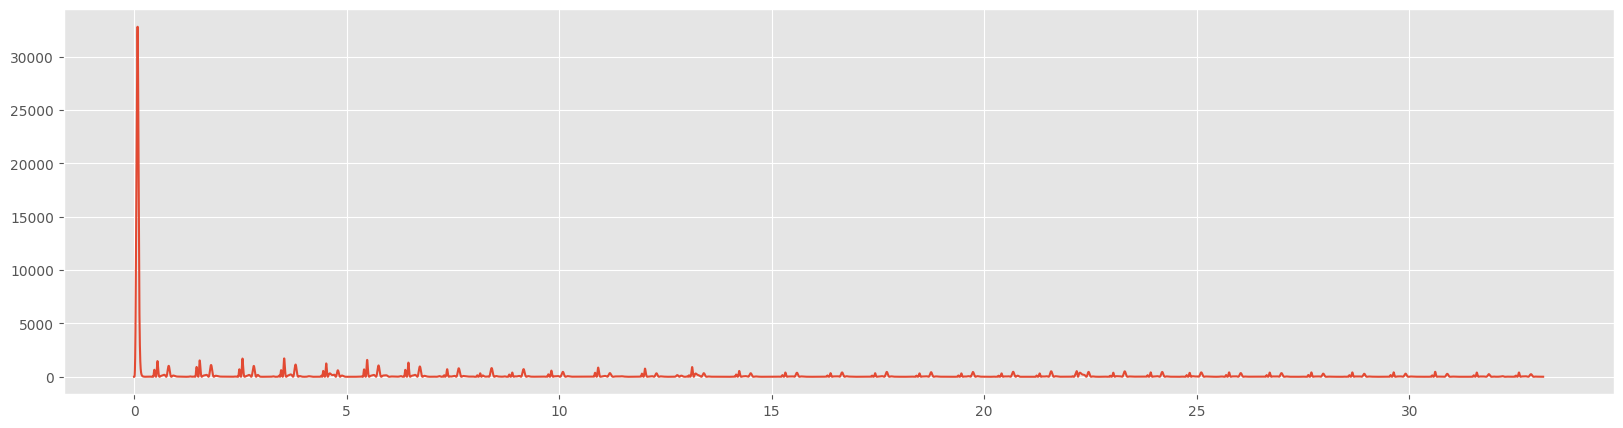

In [48]:
# Filtro cuadrado
f_sq2 = np.square(fd_signal2)
plt.figure(figsize=(20,5))
plt.plot(time2, f_sq2)
#plt.xlim(5,25)
#plt.ylim(0,50)
plt.show()

**OPERADOR MOVING WINDOW INTEGRATION**

Este operador tiene como función extraer ciertas características de la onda.

y[n]=(1/N)(x[n−(N−1)]+x[n−(N−2)]+..+x[n])

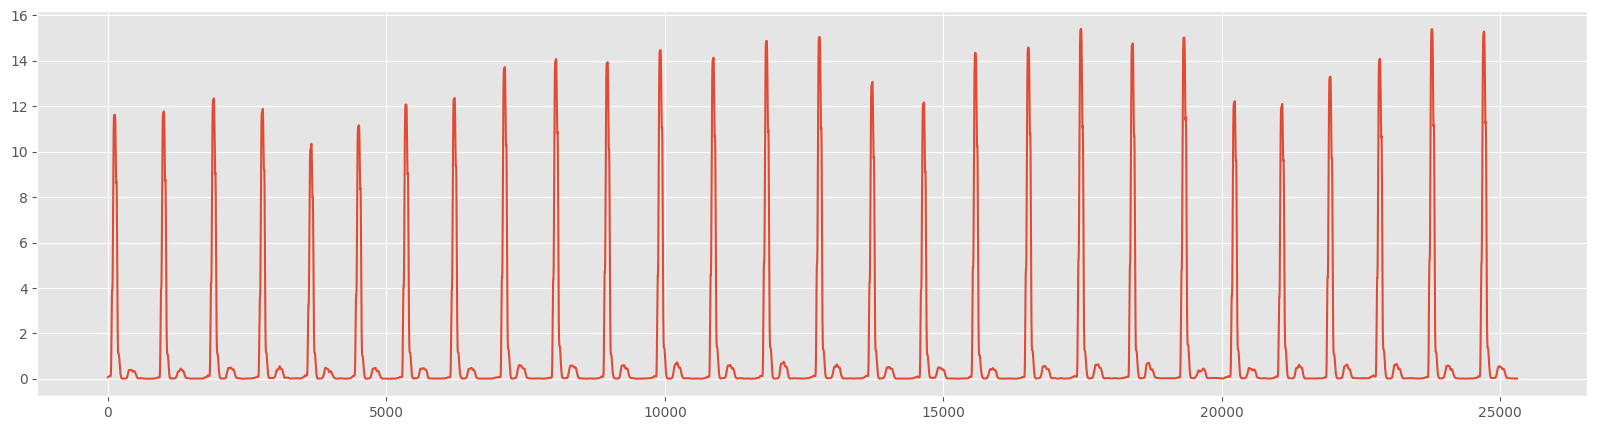

In [24]:
# Moving-Window Integration
N = 75
b = np.ones(N-1)
b = (1/N)*b
fi_signal = lfilter(b, 1, f_sq)
fi_signal=fi_signal[200:len(fi_signal)]
plt.figure(figsize=(20,5))
plt.plot(fi_signal)
plt.show()

Colocando marcadores en los picos

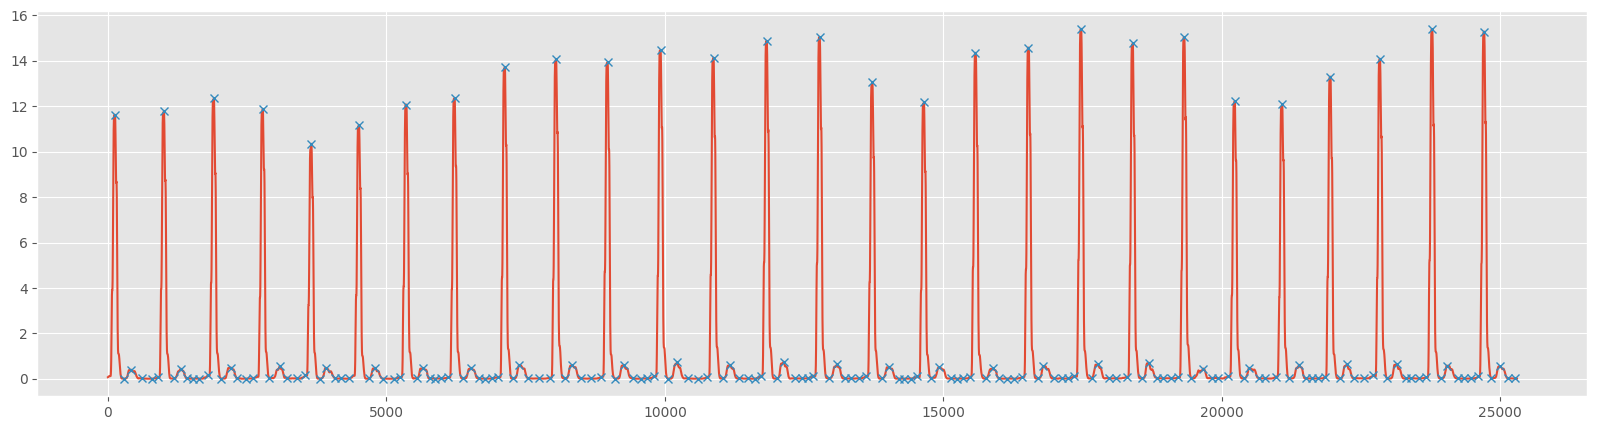

In [25]:
# Fiducial Marks
peaks, _ = find_peaks(fi_signal, distance=100)
plt.figure(figsize=(20,5))
plt.plot(fi_signal)
plt.plot(peaks, fi_signal[peaks], "x")
plt.show()

**ANÁLISIS DE THRESHOLD**

El valor del umbral de pico R de entrada es  3.852594092475177
El valor del umbral de ruido de entrada es  1.0886954791971284


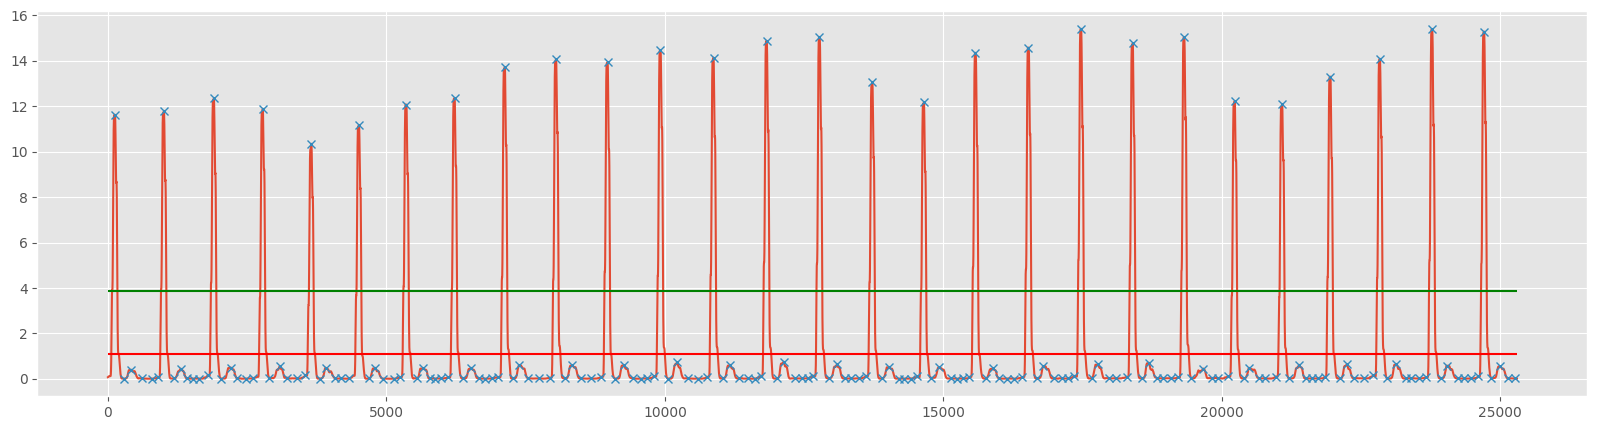

In [26]:
# Training Part to set Threshold I1 and Threshold I2
# Para las primeras muestras en 2 segundos
# Para efectos del ejercicio vamos a analizar toda la señal
f_samples = len(peaks)
th_I1 = np.max(fi_signal[peaks[:f_samples]])*0.25
th_I2 = 0.5*np.mean(fi_signal[peaks[:f_samples]])
print ("El valor del umbral de pico R de entrada es ", th_I1)
print ("El valor del umbral de ruido de entrada es ", th_I2)
plt.figure(figsize=(20,5))
plt.plot(fi_signal)
#plt.xlim(50,1000)
plt.plot(peaks, fi_signal[peaks], "x")
plt.hlines(th_I1, 0, len(fi_signal), colors='green')
plt.hlines(th_I2, 0, len(fi_signal), colors='red')
plt.show()

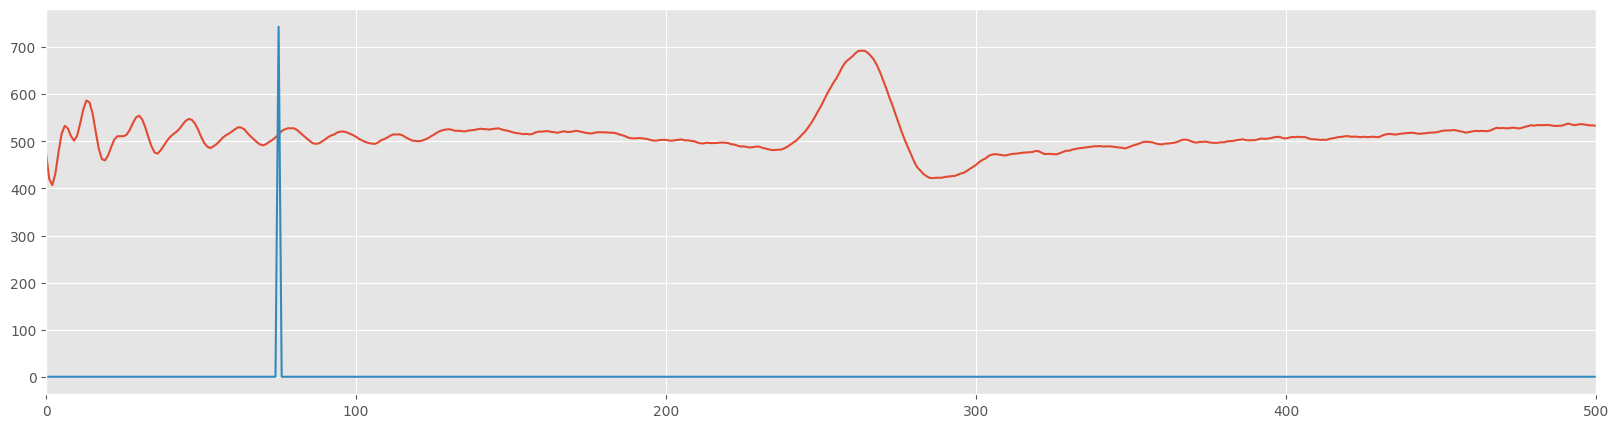

In [27]:
end_qrs = fi_signal > th_I1
roll_qrs_r = np.roll(end_qrs, 1)
roll_qrs_l = np.roll(end_qrs, -1)
end_qrs = np.logical_xor(end_qrs ,roll_qrs_r)
end_qrs = np.logical_and(end_qrs ,roll_qrs_l)
plt.figure(figsize=(20,5))
plt.xlim(0,500)
plt.plot(ecg_signal)
plt.plot(end_qrs*np.max(ecg_signal))
plt.show()

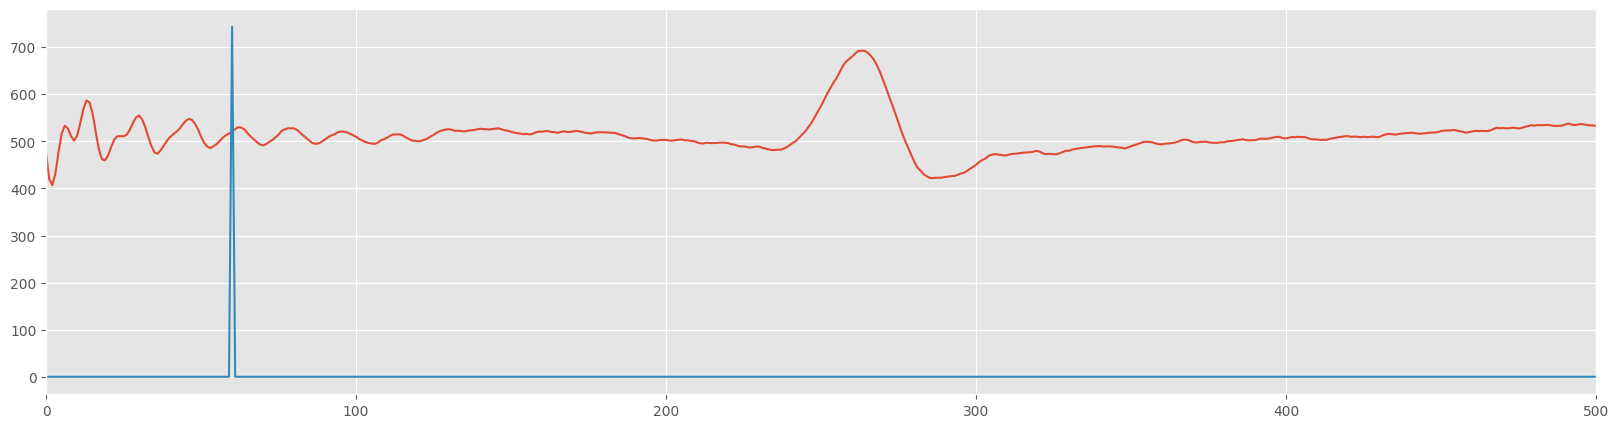

In [28]:
start_qrs = fi_signal < th_I2
roll_qrs_l = np.roll(start_qrs, -1)
roll_qrs_r = np.roll(start_qrs, 1)
start_qrs = np.logical_xor(start_qrs ,roll_qrs_l)
start_qrs = np.logical_and(start_qrs ,roll_qrs_r)
plt.figure(figsize=(20,5))
plt.plot(ecg_signal)
plt.xlim(0,500)
plt.plot(start_qrs*np.max(ecg_signal))
plt.show()

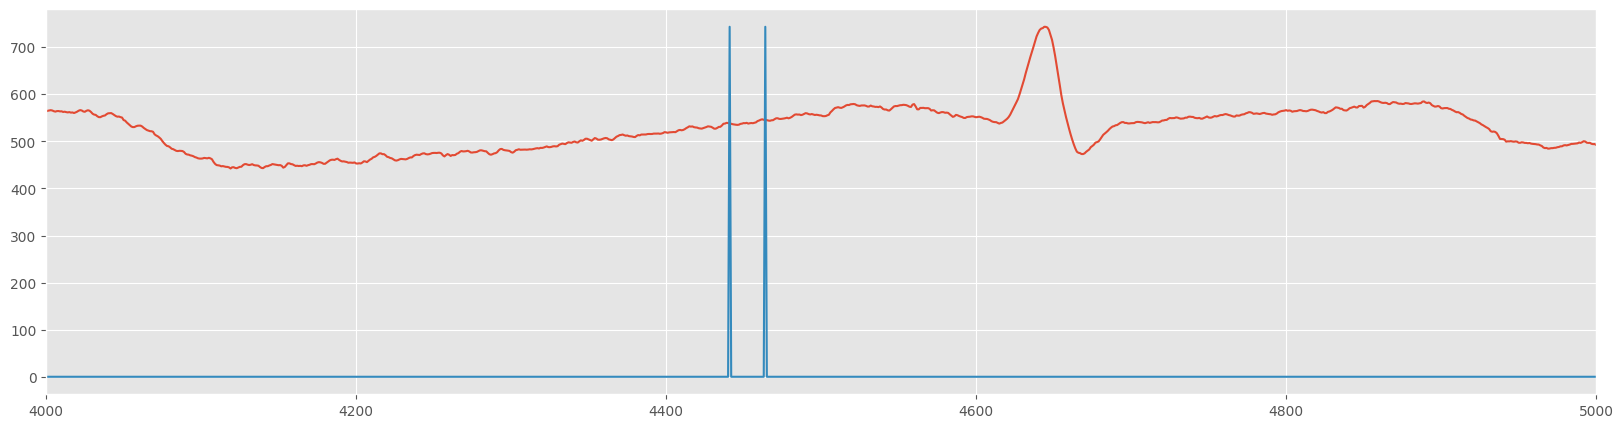

In [29]:
qrs = np.logical_or(start_qrs, end_qrs)
plt.figure(figsize=(20,5))
plt.xlim(4000,5000)
plt.plot(ecg_signal)
plt.plot(qrs*np.max(ecg_signal))
plt.show()


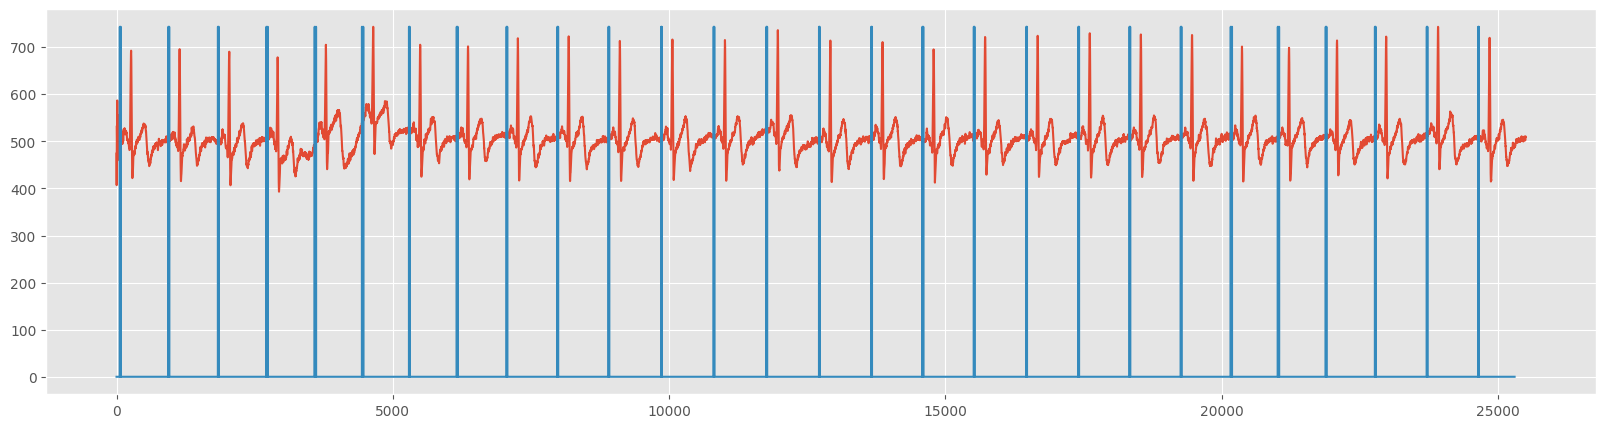

In [30]:
qrs = np.logical_or(start_qrs, end_qrs)
plt.figure(figsize=(20,5))
plt.plot(ecg_signal)
plt.plot(qrs*np.max(ecg_signal))
plt.show()